# Exploring Tennis Attributes and Tournament Outcomes

#### Authors: A.J. Madison, Robert Silber, and Spencer Tillman

#### Overview: This project is exploring the attributes of tennis players and how they placed in various tournaments throughout their career.

## Literature Review

#### Literature review

## Project Background

#### Information about purpose of the project

## Environment Setup and Data Gathering



In [ ]:
#If needed, get requirements.txt file for all required packages

#!curl -0 https://raw.githubusercontent.com/spencer130/COMP4447_FinalProject/main/requirements.txt?token=GHSAT0AAAAAABY4YJJYIHTJ3OVAL4ADFD4KY22WJUA
#!pip install -r requirements.txt

In [1]:
#Import python packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.api as sm
import scipy


#### Next, we will be importing our data from a GitHub repository where csv files are created showing ATP tournament data annually. We will import this data directly into a pandas data frame.



In [2]:
#Retrieve data from github

url_1 = 'https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_futures_1995.csv'
url_2 = 'https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_1996.csv'
url_3 = 'https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_1997.csv'
url_4 = 'https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_1998.csv'
url_5 = 'https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_1999.csv'

tennis_1 = pd.read_csv(url_1)
tennis_2 = pd.read_csv(url_2)
tennis_3 = pd.read_csv(url_3)
tennis_4 = pd.read_csv(url_4)
tennis_5 = pd.read_csv(url_5)

#Combine the data across multiple years into one data frame and add a year column
tennis_df = pd.concat([tennis_1, tennis_2, tennis_3, tennis_4, tennis_5], join='inner')
tennis_df['year'] = [x[:4] for x in tennis_df['tourney_id']]

tennis_df.sample(10)

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,year
5885,1995-M-SA-USA-04A-1995b,USA 4 Masters 2,Hard,48,S,19950707,11,122867,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1037.0,5.0,1241.0,1.0,1995
1812,1999-540,Wimbledon,Grass,128,G,19990621,13,102563,NaN,NaN,...,65.0,42.0,25.0,6.0,13.0,21.0,1564.0,248.0,158.0,1999
6882,1995-M-SA-RUS-01A-1995a,Russia Masters 1,Clay,24,S,19950729,23,101969,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,318.0,96.0,753.0,12.0,1995
6068,1995-M-SA-COL-01A-1995a,Colombia Masters 1,Clay,32,S,19950708,21,101167,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,649.0,NaN,924.0,NaN,1995
1528,1997-416,Rome Masters,Clay,64,M,19970512,4,101820,15.0,NaN,...,22.0,18.0,11.0,11.0,14.0,20.0,1533.0,108.0,431.0,1997
125,1996-338,Sydney Outdoor,Hard,32,A,19960108,2,102796,NaN,LL,...,30.0,28.0,15.0,2.0,4.0,168.0,247.0,81.0,574.0,1996
1924,1997-440,Rosmalen,Grass,32,A,19970616,5,101990,3.0,NaN,...,36.0,22.0,12.0,3.0,4.0,6.0,2431.0,60.0,798.0,1997
9938,1995-M-SA-FRA-05A-1995c,France 5 Masters 3,Hard,32,S,19951007,7,123093,NaN,Q,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1003.0,6.0,1995
9678,1995-M-SA-MEX-04A-1995b,Mexico 4 Masters 2,Hard,32,S,19950930,8,102838,5.0,Q,...,NaN,NaN,NaN,NaN,NaN,692.0,17.0,910.0,7.0,1995
2690,1999-560,US Open,Hard,128,G,19990830,100,101774,7.0,NaN,...,12.0,9.0,4.0,3.0,4.0,7.0,2327.0,81.0,575.0,1999


## Data Cleaning

#### There is a lot of data in each csv file. To begin, we will clean the data and put it into a format that is more useful for our analysis. This is necessary before we start exploring the data.

#### We will start by subsetting the data to columns that will be used in the analysis. The columns we need are:
* tourney_name: this gives us the name of the tournament
* winner_id: this shows who won the match
* winner_seed: this shows where the player ranked in the current tournament

In [56]:
#Subset the data

tennis_df_subset = tennis_df[['tourney_name', 'surface', 'winner_id', 'winner_name', 'winner_seed', 'winner_rank', 'winner_hand', 'w_ace', 'winner_age', 'loser_id', 'loser_name', 'loser_rank', 'loser_seed', 'loser_hand', 'l_ace', 'year']].copy()
tennis_df_subset.sample(10)

,tourney_name,surface,winner_id,winner_name,winner_seed,winner_rank,winner_hand,w_ace,winner_age,loser_id,loser_name,loser_rank,loser_seed,loser_hand,l_ace,year
2397,Germany 1 Masters 3,Clay,101892,Axel Finnberg,NaN,355.0,R,NaN,24.0,101502,Torben Theine,315.0,6.0,L,NaN,1995
512,San Jose,Hard,102434,Vincent Spadea,NaN,100.0,R,2.0,21.5,101196,Derrick Rostagno,112.0,NaN,R,8.0,1996
11532,Australia 3 Masters 1,Clay,101672,Michael Geserer,4.0,271.0,R,NaN,25.9,102691,Vince Mellino,670.0,NaN,R,NaN,1995
32,Doha,Hard,102247,Andrea Gaudenzi,NaN,22.0,R,2.0,22.4,102854,Sjeng Schalken,69.0,NaN,R,5.0,1996
867,Davis Cup G1 QF: ROU vs NOR,Hard,102318,Andrei Pavel,NaN,93.0,R,NaN,24.1,102107,Jan Frode Andersen,258.0,NaN,L,NaN,1998
8554,France 4 Masters 3,Hard,101600,Daniel Courcol,1.0,258.0,R,NaN,26.3,123090,Karsten Abel,1247.0,NaN,U,NaN,1995
585,Spain 2 Masters 1,Clay,102277,Bing Chao Lin,NaN,368.0,R,NaN,21.2,101982,Jordi Mas,353.0,NaN,R,NaN,1995
10260,USA 6 Masters 3,Hard,102081,Brett Hansen Dent,5.0,416.0,R,NaN,23.2,102497,Mashiska Washington,671.0,NaN,R,NaN,1995
55,India Masters 3,Clay,101769,Paul Ricar,NaN,820.0,R,NaN,24.4,100569,Toru Yonezawa,NaN,NaN,R,NaN,1995
2199,Wimbledon,Grass,101774,Todd Martin,13.0,18.0,R,9.0,25.9,101026,Jim Grabb,241.0,NaN,R,9.0,1996


#### Next, we need to find and address all null values in the data. To do so, we begin with finding how many there are in the data set.

In [57]:
#Count null values
tennis_df_subset.isna().sum()

tourney_name        0
surface             0
winner_id           0
winner_name         0
winner_seed     15128
winner_rank      1658
winner_hand         0
w_ace           13458
winner_age        236
loser_id            0
loser_name          0
loser_rank       3395
loser_seed      20328
loser_hand          0
l_ace           13458
year                0
dtype: int64

#### We have null values in our winner seed and winner rank columns. In this instance, a null value is no rank. We will replace these nulls with zeroes to show that they do not have a rank.

In [58]:
#Replace null values with zero
tennis_df_subset['winner_seed'] = tennis_df_subset['winner_seed'].fillna(0)
tennis_df_subset['winner_rank'] = tennis_df_subset['winner_rank'].fillna(0)
tennis_df_subset['loser_rank'] = tennis_df_subset['loser_rank'].fillna(0)
tennis_df_subset['loser_seed'] = tennis_df_subset['loser_seed'].fillna(0)
tennis_df_subset['w_ace'] = tennis_df_subset['w_ace'].fillna(999)
tennis_df_subset['l_ace'] = tennis_df_subset['l_ace'].fillna(999)
tennis_df_subset['winner_age'] = tennis_df_subset['winner_age'].fillna(0)
tennis_df_subset.isna().sum()

tourney_name    0
surface         0
winner_id       0
winner_name     0
winner_seed     0
winner_rank     0
winner_hand     0
w_ace           0
winner_age      0
loser_id        0
loser_name      0
loser_rank      0
loser_seed      0
loser_hand      0
l_ace           0
year            0
dtype: int64

####  Now that we have our data subsetted and null values are addressed, we need to check our data types to make sure they are in the correct format.

In [59]:
#Check the data types

tennis_df_subset.dtypes

tourney_name     object
surface          object
winner_id         int64
winner_name      object
winner_seed     float64
winner_rank     float64
winner_hand      object
w_ace           float64
winner_age      float64
loser_id          int64
loser_name       object
loser_rank      float64
loser_seed      float64
loser_hand       object
l_ace           float64
year             object
dtype: object

#### Most of the data types seem good. However, our year should be changed to datetime. We can change the data types to be more accurate.

In [60]:
tennis_df_subset['year'] = pd.to_numeric(tennis_df_subset['year'])
tennis_df_subset.dtypes

tourney_name     object
surface          object
winner_id         int64
winner_name      object
winner_seed     float64
winner_rank     float64
winner_hand      object
w_ace           float64
winner_age      float64
loser_id          int64
loser_name       object
loser_rank      float64
loser_seed      float64
loser_hand       object
l_ace           float64
year              int64
dtype: object

#### Updating ages to be round numbers

In [61]:
tennis_df_subset['winner_age'] = tennis_df_subset['winner_age'].apply(lambda x: round(x))
tennis_df_subset

,tourney_name,surface,winner_id,winner_name,winner_seed,winner_rank,winner_hand,w_ace,winner_age,loser_id,loser_name,loser_rank,loser_seed,loser_hand,l_ace,year
0,India Masters 1,Clay,102012,Martijn Belgraver,0.0,673.0,R,999.0,23,102535,Harold Jans,1197.0,0.0,R,999.0,1995
1,India Masters 1,Clay,101810,Asif Ismail,0.0,973.0,R,999.0,24,102165,Srinath Prahlad,1198.0,0.0,R,999.0,1995
2,India Masters 1,Clay,102407,Rainer Gunther,0.0,922.0,R,999.0,20,101884,Frank Ofori,337.0,0.0,R,999.0,1995
3,India Masters 1,Clay,102213,Jong Sam Chung,0.0,736.0,R,999.0,22,102316,Jong Woong Yoon,674.0,0.0,R,999.0,1995
4,India Masters 1,Clay,102276,Sandeep Kirtane,0.0,1021.0,R,999.0,21,101904,Chris Haggard,438.0,0.0,L,999.0,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3329,Dusseldorf,Clay,102374,Alex Corretja,0.0,6.0,R,999.0,25,103017,Nicolas Kiefer,21.0,0.0,R,999.0,1999
3330,Dusseldorf,Clay,102845,Carlos Moya,0.0,4.0,R,999.0,23,103163,Tommy Haas,19.0,0.0,R,999.0,1999
3331,Dusseldorf,Clay,102358,Thomas Enqvist,0.0,17.0,R,999.0,25,103163,Tommy Haas,19.0,0.0,R,999.0,1999
3332,Dusseldorf,Clay,103017,Nicolas Kiefer,0.0,21.0,R,999.0,22,102563,Thomas Johansson,18.0,0.0,R,999.0,1999


## Exploratory Data Analysis

#### After cleaning our data, we can begin exploring it. We will then visualize our data to get a better understanding.

In [62]:
#How many tournaments are in the data
tournament_names = tennis_df_subset['tourney_name'].unique()
print(len(tournament_names))

809


AxesSubplot(0.125,0.11;0.775x0.77)


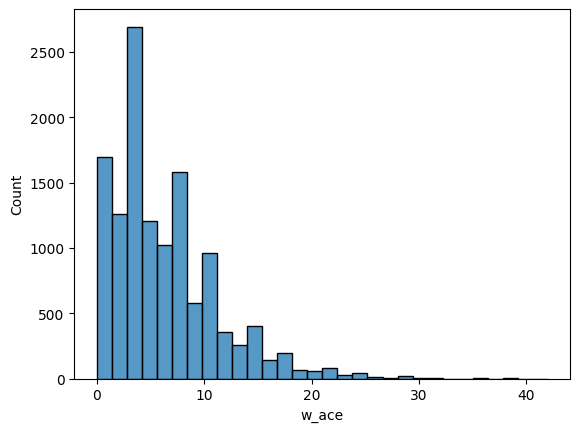

In [63]:
#What is the range of winners aces in the tournaments? Also remove values equal to 999 to not include NaN
w_ace_range = sns.histplot(x='w_ace', bins=30, data=tennis_df_subset[-(tennis_df_subset['w_ace']==999)])
print(w_ace_range)


AxesSubplot(0.125,0.11;0.775x0.77)


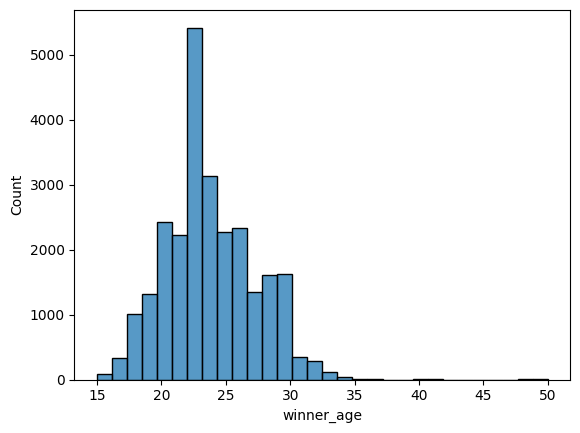

In [64]:
#What is the range of winners ages? Also remove values equal to zero
w_age_range = sns.histplot(x='winner_age', bins=30, data=tennis_df_subset[-(tennis_df_subset['winner_age']==0)])
print(w_age_range)

#### Who has the most wins over the timeframe and how many?

Yevgeny Kafelnikov has 255 wins.
0    80
1    55
2    58
3    62
Name: winner_name, dtype: int64


<AxesSubplot: title={'center': 'Wins by Yevgeny Kafelnikov over the years'}, xlabel='year', ylabel='wins'>

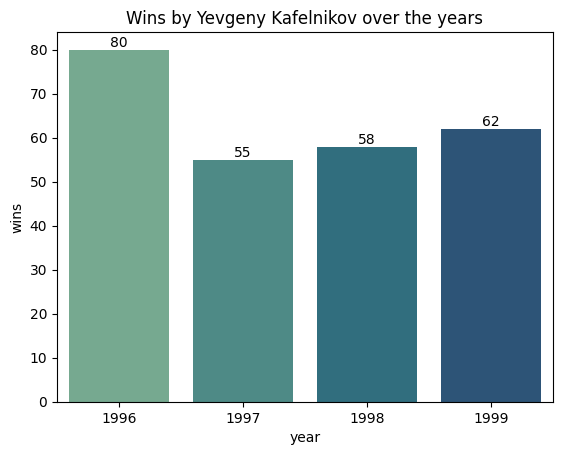

In [65]:
#Most wins by a player over the timeframe
most_wins = str(tennis_df_subset['winner_name'].value_counts().max())
player_most_wins = tennis_df_subset['winner_name'].value_counts().index.tolist()[0]
print(str(player_most_wins) + ' has ' + str(most_wins) + ' wins.')

#Wins by that player over time
player = tennis_df_subset.loc[tennis_df_subset['winner_name']==tennis_df_subset['winner_name'].value_counts().index.tolist()[0]]

player_wins = player.groupby(by='year', as_index=False).count()
print(player_wins['winner_name'])

player_wins_chart = sns.barplot(x='year', y='winner_id', data=player_wins, palette='crest')
player_wins_chart.bar_label(player_wins_chart.containers[0])
player_wins_chart.set_ylabel('wins')
player_wins_chart.set_title('Wins by ' + player_most_wins + ' over the years')
player_wins_chart


#### Who has the most aces and how many?

## Feature Engineering

#### Look for any feature engineering opportunities to build on the existing data

#### Combine winner and loser aces to create total ace

<AxesSubplot: xlabel='total_ace', ylabel='Count'>

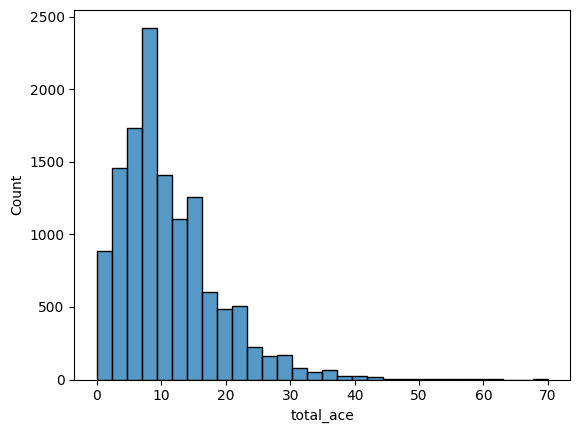

In [68]:
tennis_df_subset['total_ace'] = tennis_df_subset['w_ace'] + tennis_df_subset['l_ace']

#View the histogram of total aces and remove the NaN replacement values which equaled 1998
total_ace_hist = sns.histplot(x='total_ace', bins=30, data=tennis_df_subset[-(tennis_df_subset['total_ace']==1998)])
total_ace_hist

## Linear Regression

#### Since we have completed our EDA, we will begin looking at linear regression models. To develop a model helping find player attributes that contribute or impede player performance, we will explore linear regression. To beign, let's start with simple linear regression. Our outcome variable will be a win for the match. Using that as our target variable, we will look at how strongly correlated other variables are to producing that outcome.

#### Diagnostic plots

#### To begin, we need to create some diagnostic plots to determine if linear regression is a good choice for our analysis. One parameter to check is normality. We can do this with both the qq plot and Shapiro-Wilks test.

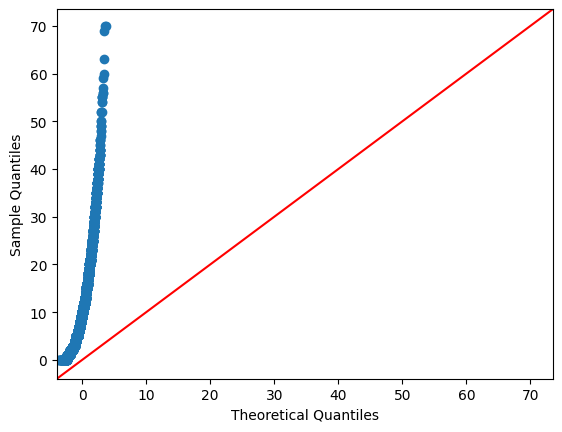

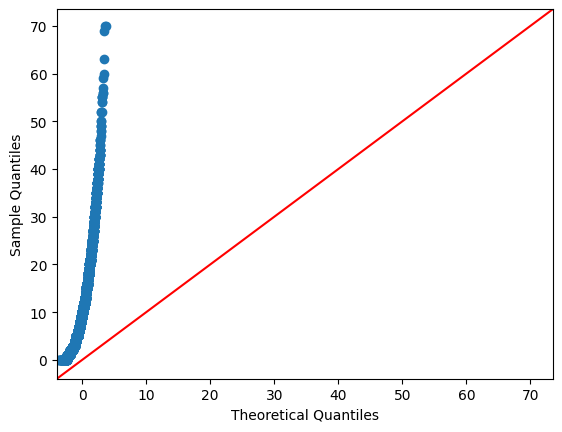

In [69]:
#Test for normality using qq plot

mask = tennis_df_subset['total_ace'].isin([1998])
tennis_df_regression = tennis_df_subset[~mask]

sm.qqplot(data=tennis_df_regression['total_ace'], line='45')

In [70]:
#Test for normality using Shapiro-Wilks test

scipy.stats.shapiro(tennis_df_regression['total_ace'].sample(n=500))


ShapiroResult(statistic=0.8948800563812256, pvalue=5.120678539212075e-18)

#### Build regression model

#### Build a few models to look at correlations

In [71]:
#Build a simple linear regression model using OLS regression model for surface types

#Convert surface types to numbers first
surface_numbers = pd.get_dummies(tennis_df_regression['surface'])
tennis_df_regression = tennis_df_regression.join(surface_numbers)

#Create OLS regression model
x = tennis_df_regression.iloc[:, 17:21]
y = tennis_df_regression['total_ace']

lm_1 = sm.OLS(y, x)
lm_1_fit = lm_1.fit()
lm_1_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              total_ace   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     624.1
Date:                Sat, 05 Nov 2022   Prob (F-statistic):               0.00
Time:                        16:14:50   Log-Likelihood:            -1.5576e+05
No. Observations:               45499   AIC:                         3.115e+05
Df Residuals:                   45495   BIC:                         3.116e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Carpet        13.1511      0.101    130.270      0.000      12.953      13.349
Clay           9.0893      0.059    155.285      0.000       8.975       9.204
Grass         12.9699      0.111    117.033      0.000      12.753      13.187
Hard          11.3433      0.053    213.545      0.000      11.239      11.447
==============================================================================
Omnibus:                    13304.714   Durbin-Watson:                   0.596
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            44887.071
Skew:                           1.474   Prob(JB):                         0.00
Kurtosis:                       6.871   Cond. No.                         2.09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Based on the model above, we have a very low R^2 at just 0.008. This shows that there is no correlation between winner's aces and the surface type.

In [72]:
# OLS model with winner rank and winner aces

#Create OLS regression model
x = tennis_df_regression['winner_rank']
y = tennis_df_regression['total_ace']

lm_2 = sm.OLS(y, x)
lm_2_fit = lm_2.fit()
lm_2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              total_ace   R-squared (uncentered):                   0.238
Model:                            OLS   Adj. R-squared (uncentered):              0.238
Method:                 Least Squares   F-statistic:                          1.424e+04
Date:                Sat, 05 Nov 2022   Prob (F-statistic):                        0.00
Time:                        16:15:15   Log-Likelihood:                     -1.7608e+05
No. Observations:               45499   AIC:                                  3.522e+05
Df Residuals:                   45498   BIC:                                  3.522e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
winner_rank     0.0631      0.001    119.316      0.000       0.062       0.064
==============================================================================
Omnibus:                     5234.860   Durbin-Watson:                   0.347
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            50017.731
Skew:                           0.141   Prob(JB):                         0.00
Kurtosis:                       8.129   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot: xlabel='winner_rank', ylabel='total_ace'>

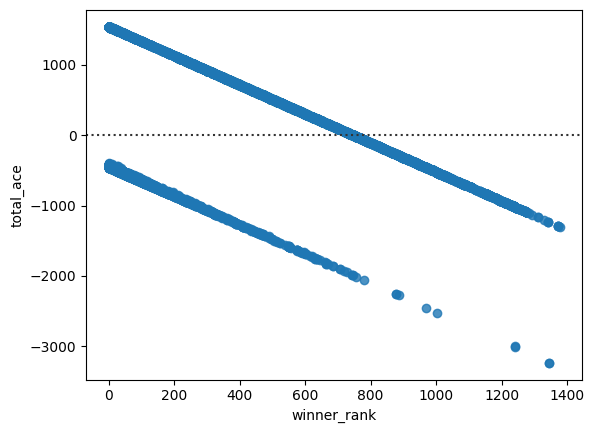

In [74]:
#Residuals Plot for winner rank and ace

sns.residplot(x='winner_rank', y='total_ace', data=tennis_df_subset)

<AxesSubplot: >

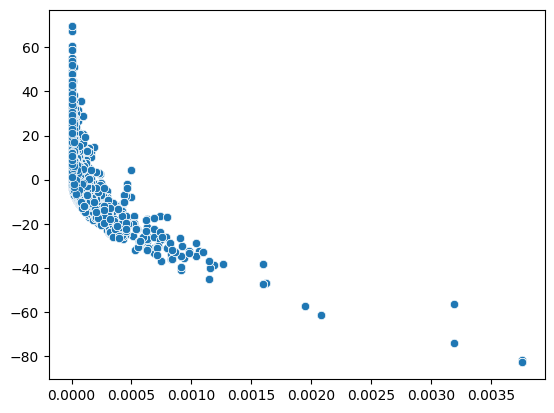

In [75]:
#Residuals vs. Leverage Plot for winners rank

#get the influence, leverage, and residual values
lm_2_infl = lm_2_fit.get_influence()
lm_2_lev = lm_2_infl.hat_matrix_diag
lm_2_resid = lm_2_fit.resid

#Plot the results
sns.scatterplot(x=lm_2_lev, y=lm_2_resid)

In [ ]:
# Ridge regression

## Conclusion

#### Findings

## Next Steps

#### Any follow on analysis that could be performed

## References

#### Tennis databases, files, and algorithms by Jeff Sackmann / Tennis Abstract is licensed under a Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License.
#### Based on a work at https://github.com/JeffSackmann.